# Autoencode me

Let's use a different architecture, an autoencoder!

We will use the functional API to define the autoencoder!

In [2]:
from keras.layers import Input, Dense
from keras.models import Model

ae_input = Input(shape=(784,))
encoder_1 = Dense(256, activation='relu')(ae_input)
encoder_2 = Dense(32, activation='relu')(encoder_1)


decoder_2 = Dense(32, activation='relu')(encoder_2)
decoder_1 = Dense(256, activation='relu')(decoder_2)
ae_output = Dense(784, activation='sigmoid')(decoder_1)


I0000 00:00:1727955511.435463 2365966 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727955511.436099 2365966 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727955511.436351 2365966 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727955511.501919 2365966 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Build the model and a get a handler to extract the hidden representation (encoded_2). Note that the weights are shared between the two models!

In [4]:
from keras.optimizers import Adam

autoencoder = Model(ae_input, ae_output)
encoder = Model(ae_input, encoder_2)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')


Get the data (as usual):

In [5]:
import keras
import numpy as np
from keras.datasets import mnist

# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0


Train the autoencoder!

In [6]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50


I0000 00:00:1727955538.158853 2366054 service.cc:146] XLA service 0x72f614004660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727955538.158871 2366054 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2024-10-03 14:38:58.181502: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-03 14:38:58.335082: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-03 14:38:58.362733: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibil

235/235 - 15s - 62ms/step - loss: 0.2207
Epoch 2/50
235/235 - 0s - 2ms/step - loss: 0.1342
Epoch 3/50
235/235 - 0s - 2ms/step - loss: 0.1202
Epoch 4/50
235/235 - 0s - 2ms/step - loss: 0.1127
Epoch 5/50
235/235 - 0s - 2ms/step - loss: 0.1072
Epoch 6/50
235/235 - 0s - 2ms/step - loss: 0.1034
Epoch 7/50
235/235 - 0s - 2ms/step - loss: 0.1006
Epoch 8/50
235/235 - 0s - 2ms/step - loss: 0.0984
Epoch 9/50
235/235 - 0s - 2ms/step - loss: 0.0966
Epoch 10/50
235/235 - 1s - 5ms/step - loss: 0.0951
Epoch 11/50
235/235 - 1s - 4ms/step - loss: 0.0938
Epoch 12/50
235/235 - 1s - 4ms/step - loss: 0.0927
Epoch 13/50
235/235 - 1s - 3ms/step - loss: 0.0917
Epoch 14/50
235/235 - 0s - 2ms/step - loss: 0.0908
Epoch 15/50
235/235 - 0s - 2ms/step - loss: 0.0899
Epoch 16/50
235/235 - 0s - 2ms/step - loss: 0.0891
Epoch 17/50
235/235 - 0s - 2ms/step - loss: 0.0883
Epoch 18/50
235/235 - 0s - 2ms/step - loss: 0.0876
Epoch 19/50
235/235 - 0s - 2ms/step - loss: 0.0870
Epoch 20/50
235/235 - 0s - 2ms/step - loss: 0.086

Let's evaluate the model by reconstructing some images!

In [7]:
original_images = x_test[:10]
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Original Images:


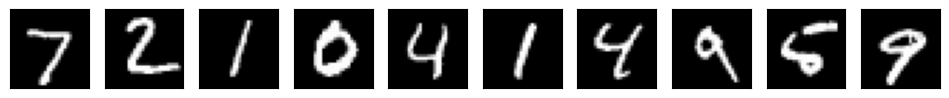

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Original Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


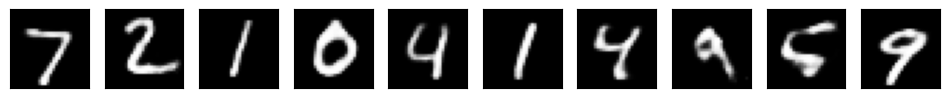

In [9]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Pretty impressive, given that we compressed the data into just 32 dimensions (compression rate > 24). Note that the model performs a kind of smoothing/denoising.

We can further improve the "denoising" abilities of the model by adding noise during the training!

In [10]:
autoencoder.fit(x_train + 0.4*np.random.randn(x_train.shape[0], 784), x_train, epochs=50, batch_size=256, verbose=2)

Epoch 1/50
235/235 - 0s - 2ms/step - loss: 0.1260
Epoch 2/50
235/235 - 0s - 2ms/step - loss: 0.1093
Epoch 3/50
235/235 - 0s - 2ms/step - loss: 0.1064
Epoch 4/50
235/235 - 0s - 2ms/step - loss: 0.1047
Epoch 5/50
235/235 - 0s - 2ms/step - loss: 0.1035
Epoch 6/50
235/235 - 0s - 2ms/step - loss: 0.1026
Epoch 7/50
235/235 - 0s - 2ms/step - loss: 0.1019
Epoch 8/50
235/235 - 0s - 2ms/step - loss: 0.1011
Epoch 9/50
235/235 - 0s - 2ms/step - loss: 0.1007
Epoch 10/50
235/235 - 0s - 2ms/step - loss: 0.1002
Epoch 11/50
235/235 - 0s - 2ms/step - loss: 0.0998
Epoch 12/50
235/235 - 0s - 2ms/step - loss: 0.0995
Epoch 13/50
235/235 - 1s - 3ms/step - loss: 0.0991
Epoch 14/50
235/235 - 0s - 2ms/step - loss: 0.0989
Epoch 15/50
235/235 - 1s - 3ms/step - loss: 0.0986
Epoch 16/50
235/235 - 0s - 2ms/step - loss: 0.0984
Epoch 17/50
235/235 - 0s - 2ms/step - loss: 0.0981
Epoch 18/50
235/235 - 0s - 2ms/step - loss: 0.0979
Epoch 19/50
235/235 - 0s - 2ms/step - loss: 0.0976
Epoch 20/50
235/235 - 0s - 2ms/step - lo

Let's reconstruct some noisy images!

In [11]:
original_images = x_test[:10] + 0.4*np.random.randn(10, 784)
reconstructed_images = autoencoder.predict(original_images).reshape((-1, 28, 28))
original_images = original_images.reshape((-1, 28, 28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Noisy Images:


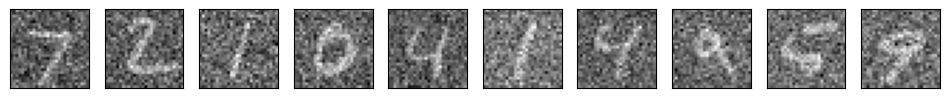

In [12]:
print("Noisy Images:")
plt.figure(1, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Reconstructed Images:


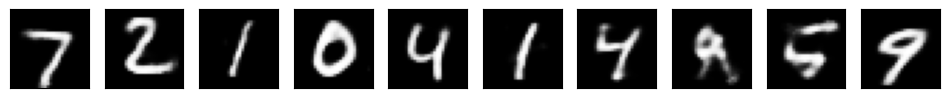

In [13]:
print("Reconstructed Images:")
plt.figure(2, figsize=(12, 8))
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)